# Stochastic Simulation: MCMC

In [1]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import random as rd
from importlib import reload  
import statsmodels.api as sm
from typing import Union

from TidySimStat import *
# tss = reload(tss)

In [17]:
results = [0.00021050415745710977, 0.0033680665193137563, 0.011472476581412483, 0.03462793390169456, 0.06915061572466057, 0.10472581833491211, 0.1551415640458899, 0.17408693821702978, 0.17556046731922956, 0.14935269971581938, 0.12230291548258078]
results

[0.00021050415745710977,
 0.0033680665193137563,
 0.011472476581412483,
 0.03462793390169456,
 0.06915061572466057,
 0.10472581833491211,
 0.1551415640458899,
 0.17408693821702978,
 0.17556046731922956,
 0.14935269971581938,
 0.12230291548258078]

In [16]:
theories = [cal_count_queue(i, 8) for i in range(0, 11)]
theories = [i / sum(theories) for i in theories]
theories

[0.00041116370815887153,
 0.0032893096652709722,
 0.013157238661083889,
 0.03508596976289037,
 0.07017193952578074,
 0.11227510324124919,
 0.14970013765499893,
 0.17108587160571304,
 0.17108587160571304,
 0.1520763303161894,
 0.12166106425295149]

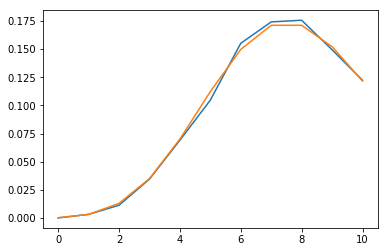

In [19]:
plt.plot([i for i in range(11)], results)
plt.plot([i for i in range(11)], theories)

In [25]:
counts = [math.ceil(i * 10000 * 0.95) for i in results]
n = sum(counts)

In [26]:
stat = cal_stat_gof(counts, theories)
pvalue = cal_pvalue_gof(stat, theories, n)
# cal_pvalue_chi2(stat, df=n-1)

0.273

In [31]:
stat, pvalue

(12.00568064531264, 0.273)

In [29]:
st.chisquare(counts, f_exp=[i * n for i in theories])

Power_divergenceResult(statistic=12.005680645312639, pvalue=0.284676495668884)

## 2 Dimension

In [2]:
def cal_block_rate_2d(n_servers:int, a1:float, a2:float, n_sample:int=10000):
    if n_servers != 10:
        raise ValueError(f"The number of servers must be set as 10 for now.")

    ## Store all possible values in a list
    li = []
    for i in range(0, n_servers + 1):
        li += [(i, j) for j in range(0, n_servers + 1)]

    ## Drop those tuples violating constraints
    li = [x for x in li if x[0] + x[1] <= n_servers]

    ## When `n_servers` is 10, the size of `li` is 66.
    shape1 = 6
    ss = get_ss_2d(li, shape1)
    shape2 = 11

    f_y = lambda x: loop_rdw_2d(x, shape1, shape2)

    def f_b(x):
        i, j = ss[x]
        result = a1**i * a2**j / math.factorial(i) / math.factorial(j)
        return result

    f_accept = lambda x, y: accept_simple(x, y, f_b)

    xz1 = (rd.randint(1, shape1+1), rd.randint(1, shape1+2))
    results = sim_mcmc(xz1, f_y, f_accept, n_sample)

    return results, li

In [9]:
results, li = cal_block_rate_2d(10, 4, 4, 10000)

In [15]:
x_results = [results[i]['x'] for i in range(1000 + 1, 10000 + 1)]
counts = {}
freqs = {}
for t in li:
    c = x_results.count(t)
    counts[t] = c
    freqs[t] = c / 9000

In [16]:
counts

{(1, 4): 121,
 (3, 0): 0,
 (6, 3): 129,
 (6, 2): 148,
 (0, 5): 0,
 (0, 3): 0,
 (8, 0): 0,
 (0, 6): 0,
 (0, 10): 0,
 (0, 9): 0,
 (1, 6): 89,
 (1, 2): 144,
 (2, 4): 141,
 (5, 5): 135,
 (2, 8): 137,
 (1, 0): 0,
 (2, 5): 132,
 (0, 2): 0,
 (0, 1): 0,
 (1, 3): 138,
 (4, 0): 0,
 (1, 7): 117,
 (3, 2): 158,
 (5, 2): 147,
 (8, 1): 0,
 (3, 5): 137,
 (1, 5): 129,
 (0, 8): 0,
 (4, 1): 154,
 (9, 1): 0,
 (0, 7): 0,
 (1, 9): 125,
 (2, 3): 153,
 (8, 2): 0,
 (4, 3): 131,
 (7, 2): 0,
 (3, 4): 156,
 (0, 4): 0,
 (6, 4): 130,
 (6, 0): 0,
 (1, 1): 148,
 (9, 0): 0,
 (2, 7): 129,
 (2, 0): 0,
 (2, 1): 152,
 (4, 4): 135,
 (2, 2): 154,
 (4, 6): 122,
 (5, 0): 0,
 (5, 4): 109,
 (7, 0): 0,
 (7, 3): 0,
 (5, 1): 160,
 (3, 6): 138,
 (5, 3): 142,
 (1, 8): 131,
 (3, 1): 179,
 (4, 5): 128,
 (0, 0): 0,
 (6, 1): 173,
 (4, 2): 134,
 (10, 0): 0,
 (7, 1): 0,
 (3, 3): 150,
 (3, 7): 117,
 (2, 6): 112}